<a href="https://colab.research.google.com/github/bishair/Model/blob/main/GW1Model-Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install tensorflow pandas scikit-learn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# Prompt the user to select a file from their local computer
uploaded = files.upload()

Saving G1F.csv to G1F.csv


In [19]:
# Get a list of all files in the current working directory (where uploaded files are located)
uploaded_files = os.listdir()

# Print the list of uploaded files
print("Uploaded files:")
for file in uploaded_files:
    print(file)

Uploaded files:
.config
G1F.csv
G10F.csv
sample_data


In [ ]:
#os.remove("")

In [20]:
data = pd.read_csv('G1F.csv', delimiter=';')

In [21]:
data.head()

,date,G1,RiverLevel,Recharge,Precipitation
0,02/06/2014,"110,738","110,659","5,00E-09",0
1,03/06/2014,"110,658","110,49","5,00E-09",0
2,04/06/2014,"110,563","110,391","5,00E-09",0
3,05/06/2014,"110,498","110,292","5,00E-09",0
4,06/06/2014,"110,428","110,234","5,00E-09",0


In [22]:
# RplacE commas with dots in excel
for col in ['G1', 'RiverLevel', 'Recharge', 'Precipitation']:
    data[col] = pd.to_numeric(data[col].str.replace(',', '.'), errors='coerce')

# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
#Use fit_transform => calculate max and min for each feature and scale according to these values
data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']] = scaler.fit_transform(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])
print(data[['G1', 'RiverLevel', 'Recharge', 'Precipitation']])

# Split the data into features and target
X = data[['RiverLevel', 'Recharge', 'Precipitation']]
y = data['G1']
print('X',X)
print('y',y)
# Split the data into training (80%) and testing sets. Shuffle the dataset before splitting it into training and test sets to remove order bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

           G1  RiverLevel  Recharge  Precipitation
0    0.996575    0.864353       0.0       0.000000
1    0.941781    0.775499       0.0       0.000000
2    0.876712    0.723449       0.0       0.000000
3    0.832192    0.671399       0.0       0.000000
4    0.784247    0.640904       0.0       0.000000
..        ...         ...       ...            ...
104  0.743151    0.872766       0.0       0.010638
105  1.000000    1.000000       0.0       0.000000
106  0.976027    0.926393       0.0       0.000000
107  0.986301    0.904837       0.0       0.000000
108  0.921233    0.778128       0.0       0.000000

[109 rows x 4 columns]
X      RiverLevel  Recharge  Precipitation
0      0.864353       0.0       0.000000
1      0.775499       0.0       0.000000
2      0.723449       0.0       0.000000
3      0.671399       0.0       0.000000
4      0.640904       0.0       0.000000
..          ...       ...            ...
104    0.872766       0.0       0.010638
105    1.000000       0.0       0.

In [23]:
# Model
#input will be arrays with a number of elements equal to the number of features. shape(rows(noOfSamples), columns(no.ofFeatures) )
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),    #First hidden layer
    Dense(64, activation='relu'),                                       #Second hidden layer
    Dense(1)                                                            #Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Train the model
#entire dataset will be passed through the neural network 100 times
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"MSE: {loss}")

Epoch 1/100
3/3 [==============================] - 1s 98ms/step - loss: 0.1391 - val_loss: 0.1960
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.1094 - val_loss: 0.1550
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0836 - val_loss: 0.1216
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0638 - val_loss: 0.0948
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0495 - val_loss: 0.0743
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0379 - val_loss: 0.0585
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0296 - val_loss: 0.0458
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0245 - val_loss: 0.0363
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0204 - val_loss: 0.0303
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0183 - val_loss: 0.0264
Epoch 11/100
3/3 [=

1/1 [==============================] - 0s 98ms/step


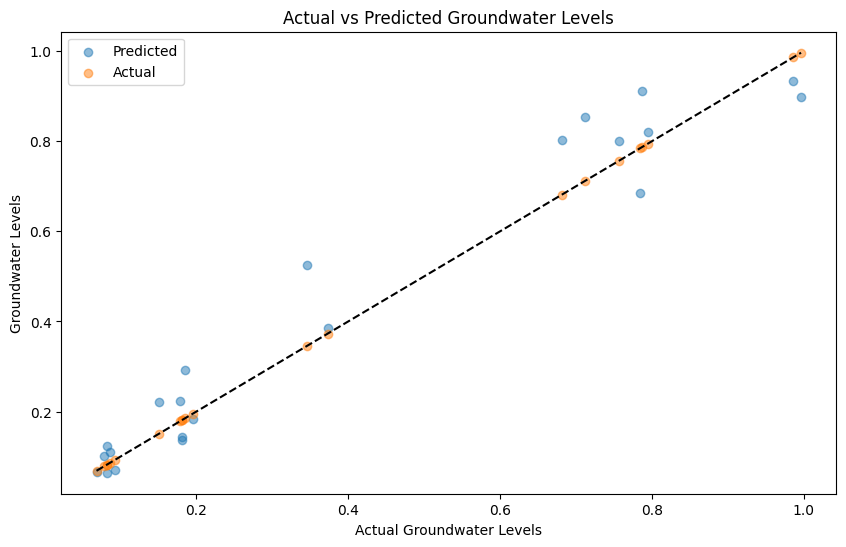

In [25]:

# Predict the groundwater levels on the test set and flatten the 2D array into 1D array
y_pred = model.predict(X_test).flatten()

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual')
plt.xlabel('Actual Groundwater Levels')
plt.ylabel('Predicted Groundwater Levels')
plt.title('Actual vs Predicted Groundwater Levels')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--') # Diagonal line
plt.legend()
plt.show()

